In [1]:
import numpy as np
from utils import read_dataset, drop_useless

In [2]:
# Reading all the data from subject "Finn"
dataset = read_dataset("Finn",
                       # timestamp="10-12-24",
                       read_ort=False)

# Filling data if joint angles are not calculatable - max fill 1sec 
for nd in dataset:
    nd.fill(1.0)
# cutting data apart and leaving out if joint angle have massiv shifts -> most certainly markers are swapped
dataset = drop_useless(dataset)
# applying moving average filter on emg and joint angle data 
for nd in dataset: 
    nd.moving_average_filter(30, on="emg")
    nd.moving_average_filter(10, on="joints")

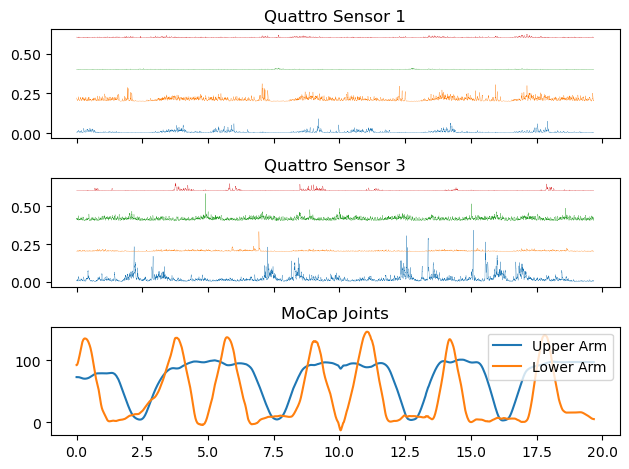

In [3]:
dataset[1].plot(plot_emg=True, plot_mocap_joints=True)

In [4]:
# Make windows --> window size 10 / 100Hz = 100ms equals 222 sample in emg (Sample Rate: 2222Hz) 
# Future offset on mocap is win_size / 2 = 50ms -> predicting 50 ms ahead 
win_size = 10
dataset = [x.get_data(win_size, win_size, 222, win_size/2) for x in dataset]

In [5]:
joints, marker, marker_pred, emg_data = (np.vstack(x) for x in zip(*dataset))

In [6]:
# About 6 hours of data 
emg_data.shape[0] * win_size / 100 / 60**2

6.083111111111111

In [7]:
# inputs have 218_992 windows each containing 222 Samples and 8 channels; 218_
targets = joints[:, -1, :]
inputs = emg_data
inputs.shape, targets.shape

((218992, 222, 8), (218731, 2))

In [8]:
joints.shape, emg_data.shape


((218731, 10, 2), (218992, 222, 8))